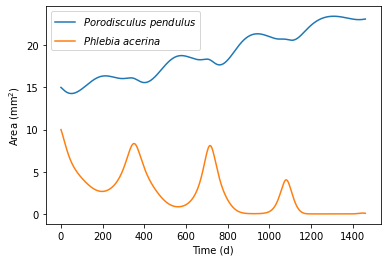

In [76]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Time (days) of simulation
time = 2*730

r1 = 0.005*1.25
r2 = 0.005*7.40
k = 25
beta12 = 0.50
beta21 = 0.75
alpha = 2.43/122
gamma = 21.10/122

# z[0]=N1, z[1]=N2, z[2]=M, function to model the differential equations
def model(z, t, r1, r2, k, beta12, beta21, alpha, gamma):
    N1, N2 = z
    dN1 = (r1 * N1 * ((k-N2) - N1 - beta21 * N2) / (k-N2))*(0.50+np.sin(t*2*np.pi/365))
    dN2 = (r2 * N2 * ((k-N1) - N2 - beta12 * N1) / (k-N1))*(0.25+np.sin(t*2*np.pi/365))
    return [dN1, dN2]

# All t values (range of simulation)
t = np.linspace(0, time, time)

# Initial conditions: [N1, N2]
IC = [15,10]

# Parameters (r1, r2, k, beta12, beta21, alpha, gamma)
params = (r1, r2, k, beta12, beta21, alpha, gamma)

# Solve the ODE System
sols = odeint(model, IC, t, params)

# Calculate dM/dt by subtracting the populations multiplied by their coefficients alpha and gamma
dMdt = np.zeros(time)
for i in range(time):
    dMdt[i] = -params[-2] * sols[i][0] - params[-1] * sols[i][1]
dMdt /= k

# Plot all solutions on one graph (need to change)
plot = plt.plot(t, sols)
plt.legend(iter(plot), (r'$Porodisculus$ $pendulus$', r'$Phlebia$ $acerina$'))
plt.ylabel(r"Area (mm$^2$)")
plt.xlabel(r"Time (d)")
plt.savefig(fname=str(IC[0])+str(IC[1])+"AreaMoisture.png", dpi=500)

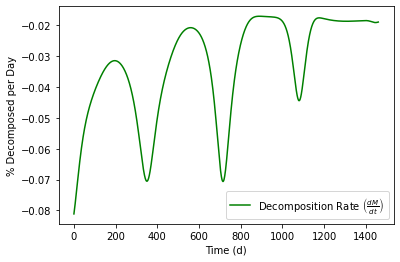

In [77]:
plt.plot(t, dMdt, 'g', label=r"Decomposition Rate $\left(\frac{dM}{dt}\right)$")
plt.xlabel(r"Time (d)")
plt.ylabel(r"% Decomposed per Day")
plt.legend()
plt.savefig(str(IC[0])+str(IC[1])+"DMMoisture.png", dpi=500)